In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.mode.chained_assignment = None


Survival: выжил 0 = нет, 1 = да
Pclass: класс билета 1 = 1-ый, 2 = 2-ой, 3 = 3-ий
Sex: пол
Age: возраст
Sibsp: братья и сестры / супруги на борту
Parch: родители / дети на борту
Ticket: номер билета
Fare: цена билета
Cabin: номер каюты
Embarked: порт посадки C = Cherbourg, Q = Queenstown, S = Southampton

###  1 задание. 
Загрузить данные в датафрейме `data` и вывести статистику по данным.\
Сохранить название колонок в виде **списка** в переменной `col`

In [3]:
data = pd.read_csv('titanic_an.csv')
display(data.describe())
col = data.columns.values
display(col)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

###  2 задание. 
На основе датафрейма `data` создать датафрейм `df` со следующими колонками `['PassengerId','Survived', 'Pclass','Sex','Age','SibSp','Parch','Embarked']`. "Отвязать" `df` от датафрейма `data`

In [4]:
df = pd.DataFrame(data, columns = col)
df = df.copy(deep=True)
display(df.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


###  3 задание (начиная с этого задания и ниже используем только `df`).
Заменить название портов `['C','S','Q']` на `['Cherbourg','Southampton','Queenstown']`

In [5]:
df.replace

def change_embarked(x):
    if x == 'C':
        x = "Cherbourg"
    elif x == 'S':
        x = 'Southampton'   
    elif x == "Q": 
        x = 'Queenstown'
    return x

df["Embarked"] = df['Embarked'].apply(change_embarked)

display(df['Embarked'].unique())
display(df.head(3))

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton


###  4 задание.
Построить таблицу: строки - название портов, столбцы - погибшие/выживщие

In [6]:
df1 = df.copy()

df1['Saved']=df1["Survived"].replace({0: 'Погибшие', 1: 'Выжившие'})

pivo_table = pd.pivot_table(data = df1, index = ['Embarked'], columns = ['Saved'], aggfunc = 'size')
display(pivo_table)

Saved,Выжившие,Погибшие
Embarked,,
Cherbourg,93,75
Queenstown,30,47
Southampton,217,427


###  5 задание.
Найти вероятность выживания в каютах 1-3 класса (столбцы) и порту посадки (колонки)

In [7]:
crosstab = pd.crosstab(index = df1['Pclass'], columns = df1['Embarked'], values = df1['Saved'], aggfunc = 'count', normalize = 'index')
display(crosstab)

Embarked,Cherbourg,Queenstown,Southampton
Pclass,,,
1,0.397196,0.009346,0.593458
2,0.092391,0.016304,0.891304
3,0.134420,0.146640,0.718941


###  6 задание
Вывести все строки содержащие пропущенные данные хотябы в одном столбце

In [8]:
allrows_withNaN = df[df.isna().any(axis=1)]
display(allrows_withNaN.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Queenstown
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,Southampton
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,Southampton
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,Cherbourg
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,Southampton
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,Southampton
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,Southampton


###  7 задание
Построить столбцовые диаграммы по полу для погибших и выживщих (на одном графике четыре столбца)

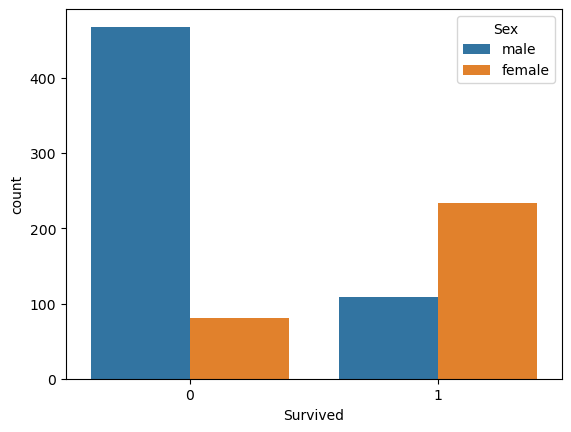

In [9]:
sns.countplot(data=df, x = "Survived", hue="Sex")
plt.show();

###  8 задание
Добавить столбец `who` для `male`, `female` старше 16 лет  `man` и `woman`, для тех кому менее 16 лет - `child` 

In [10]:
def who(x):
    ans= ''
    if(x['Age'] > 16):
        ans = 'woman' if(x.Sex =='female') else 'man'
    else:
        ans = 'child'
    return ans
        

df['who'] = df.apply(lambda x: who(x), axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,man
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton,man
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton,woman
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton,child
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg,man


###  9 задание
Постоить таблицу, в строках класс каюты `Pclass`, в столбцах `man`, `woman`, `child` значение - процент выживших.

In [14]:
pd.crosstab(index = df['Pclass'], columns = df['who'], values = df1['Survived'], aggfunc = 'count', normalize = 'index')

who,child,man,woman
Pclass,,,
1,0.180556,0.453704,0.365741
2,0.173913,0.478261,0.347826
3,0.419552,0.439919,0.140530
